In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import csv
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable
import operator

In [11]:
rcParams['figure.figsize'] = (15, 7)
rcParams['ytick.labelsize'],rcParams['xtick.labelsize'] = 13.,13.
rcParams['axes.labelsize']=10.
rcParams['legend.fontsize']=12.
rcParams['axes.titlesize']=15.

In [68]:
# Read in the covariance matrix as a vector
list = open("SN_covmat.txt").read().splitlines()
float_list = np.asfarray(list)
# Reshaping the covariance vector to sqrt(961)xsqrt(961) matrix
cov = np.reshape(float_list, (31, 31))
# Printing the length of covariance vector and the shape of covariance matrix
print('\033[1m' + 'covariance vector length:', np.shape(float_list), '\ncovariance matrix shape:',np.shape(cov))

covariance vector length: (961,) 
covariance matrix shape: (31, 31)


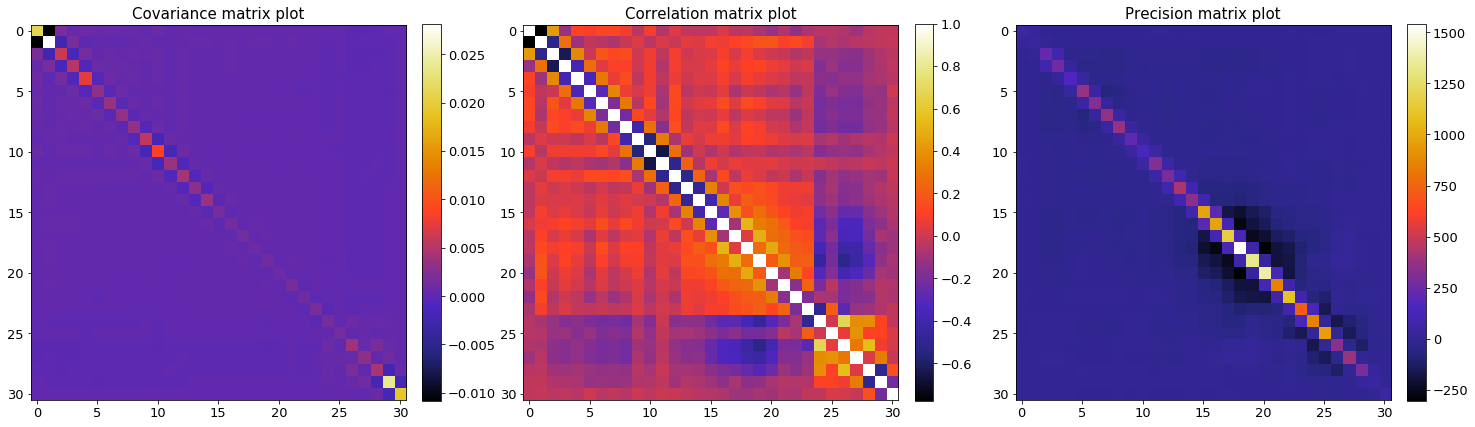

In [69]:
# Calculating the correlation matrix
pddata = pd.DataFrame(data=cov)
corr = pddata.corr()
# Calculating the inverse/precision matrix
inverse = np.linalg.inv(cov)

# Plotting the Covariance, Correlation, Precision matrices
fig,(ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(25,25))

ax1 = plt.subplot(1,3,1)
im1 = ax1.imshow(cov, vmin=np.max(cov), vmax=np.min(cov), cmap='CMRmap')
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
ax1.set_title('Covariance matrix plot')

ax2 = plt.subplot(1,3,2)
im2 = ax2.imshow(corr, vmin=corr.values.min(), vmax=corr.values.max(), cmap='CMRmap')
cbar2 = fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
ax2.set_title('Correlation matrix plot')

ax3 = plt.subplot(1,3,3)
im3 = ax3.imshow(inverse, vmin=np.min(inverse), vmax=np.max(inverse), cmap='CMRmap')
cbar3 = fig.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)
ax3.set_title('Precision matrix plot')


plt.show()

In [70]:
# Reading the values of the correlation matrix
corr_values = corr.values
# Sorting the values by their absolute value
sorted_flattened_corr_values = np.sort(np.abs(corr_values.flatten()))
# Keeping the unique values as we have double the values due to the matrix being diagonal
unique_sorted_flattened_corr_values = np.unique(sorted_flattened_corr_values)

# Printing the most and least correlated data points
print ('\033[1m' + 'The two least correlated data are:','\n\nCoordinates:', np.where(corr_values==unique_sorted_flattened_corr_values[0]),'\nValue =', unique_sorted_flattened_corr_values[0],
       '\nCoordinates: ' ,np.where(corr_values==unique_sorted_flattened_corr_values[1]), '\nValue =:',unique_sorted_flattened_corr_values[1],
       '\n\n\nWhile the most correlated data are:','\n\nCoordinates: ', np.where(corr_values==-unique_sorted_flattened_corr_values[-2]),'\nValue =', unique_sorted_flattened_corr_values[-2],
       '\nCoordinates: ', np.where(corr_values==unique_sorted_flattened_corr_values[-3]),'\nValue =', unique_sorted_flattened_corr_values[-3])

The two least correlated data are: 

Coordinates: (array([24, 25], dtype=int64), array([25, 24], dtype=int64)) 
Value = 0.0004625308248552437 
Coordinates:  (array([ 5, 14], dtype=int64), array([14,  5], dtype=int64)) 
Value =: 0.0008919863685486651 


While the most correlated data are: 

Coordinates:  (array([0, 1], dtype=int64), array([1, 0], dtype=int64)) 
Value = 0.7769915917059655 
Coordinates:  (array([24, 26], dtype=int64), array([26, 24], dtype=int64)) 
Value = 0.6864175966534766


In [75]:
# Printing the most correlated data that contain the least information
print('\033[1m' + 'The data points that are mostly correlated, are:\n\n', unique_sorted_flattened_corr_values[-12:-2],
      '\n\nHence containing the least information and the first ones to be thrown out if necessary.')

The data points that are mostly correlated, are:

 [0.50140011 0.50665589 0.51438948 0.51486756 0.52797874 0.55023742
 0.56141514 0.62517022 0.64778112 0.6864176 ] 

Hence containing the least information and the first ones to be thrown out if necessary.


In [76]:
std=[]
# Append diagonal of the covariance matrix in an array as these values contain the error
for i in pddata:
    std=np.append(std, pddata[i][i])
# Calculating standard error
err=std/np.sqrt(31)
# Appending the errors in a dictionary so I can identify which error corresponds to which row
errdic = dict(enumerate(err))
# The highest value is the one with the biggest error bar
max_err = max(errdic.items(), key=operator.itemgetter(1))

print('\033[1m' + 'The largest error bar is', max_err[1], 'and it is in the second row.')

The largest error bar is 0.00505688114852061 and it is in the second row.


In [77]:
# Calculating the determinant of the covariance matrix
det = np.linalg.det(cov)

print('\033[1m' + 'det[cov] =', det, 'which is almost but not equal to zero, therefore the inverse exists.',
      '\nA covariance matrix with exactly zero determinant would mean that all the random variables are perfectly correlated')

det[cov] = 6.718326097653836e-79 which is almost but not equal to zero, therefore the inverse exists. 
A covariance matrix with exactly zero determinant would mean that all the random variables are perfectly correlated
